In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats


In [2]:
def raspodela_1D(mi, sigma):
    x1 = np.arange((mi[0]-3*np.sqrt(sigma[0])), (mi[0]+3*np.sqrt(sigma[0])), 0.2)
    F1 = scipy.stats.multivariate_normal.pdf(x1, mi[0], sigma[0])
    plt.plot(x1,F1)
    x2 = np.arange((mi[1]-3*np.sqrt(sigma[1])), (mi[1]+3*np.sqrt(sigma[1])), 0.2)
    F2 = scipy.stats.multivariate_normal.pdf(x2, mi[1], sigma[1])
    plt.plot(x2,F2)

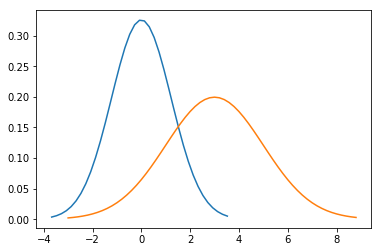

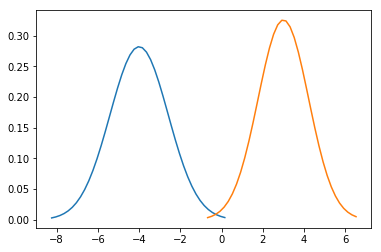

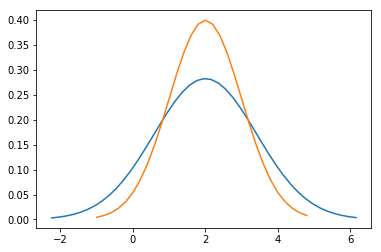

In [3]:
raspodela_1D([0, 3], [1.5, 4])
fig=plt.figure()
raspodela_1D([-4, 3], [2, 1.5])
fig=plt.figure()
raspodela_1D([2, 2], [2, 1])

In [4]:
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

def raspodela_2D(mi1, mi2, sigma1, sigma2):
    x_min = np.minimum(mi1, mi2) #min po koordinati
    x_max = np.maximum(mi1, mi2)
    sigma_max = np.maximum(np.diag(sigma1), np.diag(sigma2))
    
    x1 = np.arange(x_min[0]-3*np.sqrt(sigma_max[0]), x_max[0]+3*np.sqrt(sigma_max[0]), 0.2)
    x2 = np.arange(x_min[1]-3*np.sqrt(sigma_max[1]), x_max[1]+3*np.sqrt(sigma_max[1]), 0.2)
    
    X1, X2 = np.meshgrid(x1, x2)
    pos = np.empty(X1.shape + (2,))
    pos[:, :, 0] = X1
    pos[:, :, 1] = X2
    
    fig = plt.figure(figsize=(16,8))
    ax = fig.gca(projection='3d')
    
    F1 = stats.multivariate_normal(mi1, sigma1)
    ax.plot_wireframe(X1, X2, F1.pdf(pos))
    
    F2 = stats.multivariate_normal(mi2, sigma2)
    ax.plot_wireframe(X1, X2, F2.pdf(pos))
    
    

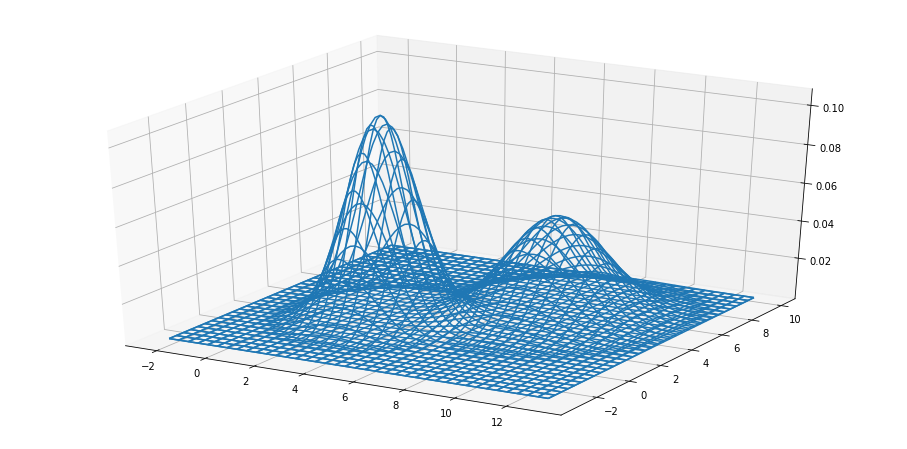

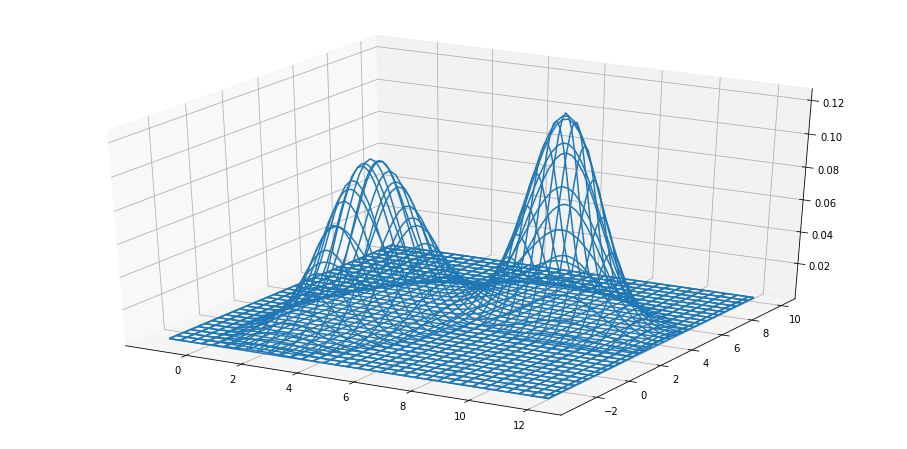

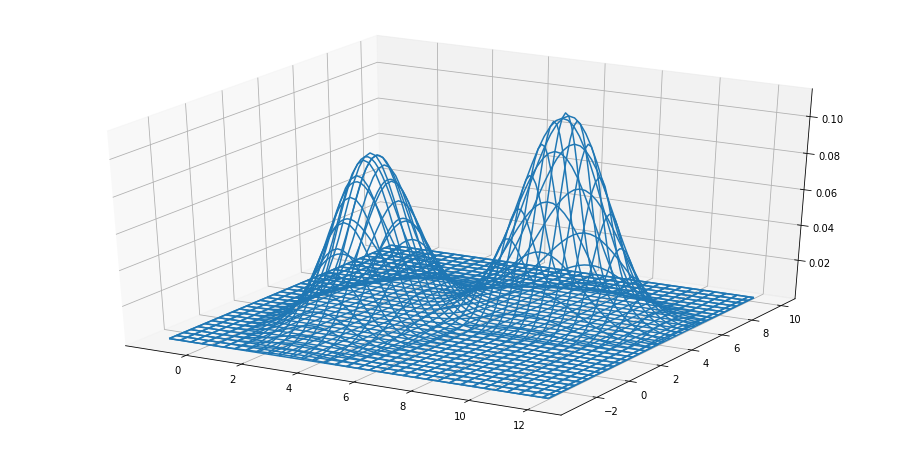

In [5]:
raspodela_2D([3, 2], [8, 5], [[1.5, 0], [0, 1.5]], [[3, 0], [0, 3]])

raspodela_2D([3, 2], [8, 5], [[1, 0.6], [0.6, 3]], [[2, -0.6], [-0.6, 1]])

raspodela_2D([3, 2], [8, 5], [[1, 0], [0, 3]], [[2, 0], [0, 1]])

In [6]:
def uzorci(mi, sigma, N):
    x, y = np.random.multivariate_normal(mi, sigma, N).T
    plt.plot(x, y, 'x')
    plt.axis('equal')

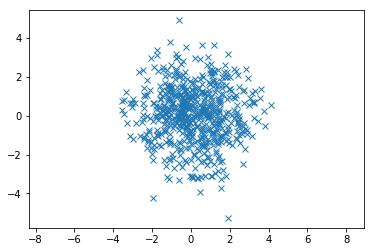

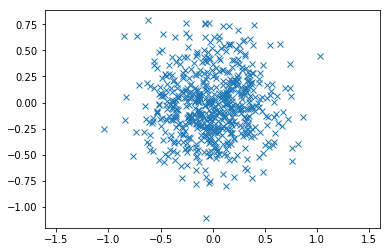

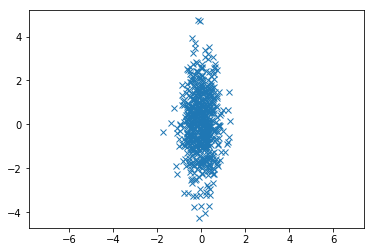

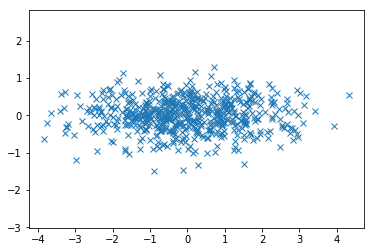

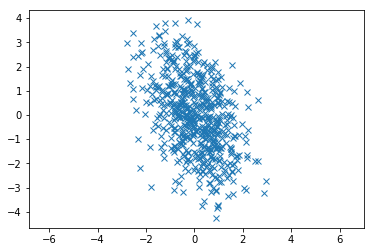

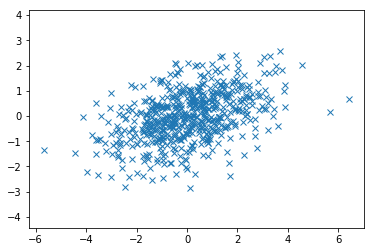

<Figure size 432x288 with 0 Axes>

In [7]:
uzorci([0,0], [[2, 0],[0, 2]], 600)
fig=plt.figure()
uzorci([0,0], [[0.1, 0],[0, 0.1]], 600)
fig=plt.figure()
uzorci([0,0], [[0.2, 0],[0, 2]], 600)
fig=plt.figure()
uzorci([0,0], [[2, 0],[0, 0.2]], 600)
fig=plt.figure()
uzorci([0,0], [[1, -0.7],[-0.7, 2.5]], 600)
fig=plt.figure()
uzorci([0,0], [[2.5, 0.7],[0.7, 1]], 600)
fig=plt.figure()

In [8]:
def ML_odluka(D, mi1, mi2, sigma1, sigma2):
    oznake = np.unique(D[:,-1])
    F1 = scipy.stats.multivariate_normal.pdf(D[:,:-1], mi1, sigma1)
    F2 = scipy.stats.multivariate_normal.pdf(D[:,:-1], mi2, sigma2)
    
    odluke = F1>F2
    rez_oznake = odluke*oznake[0] + (1-odluke)*oznake[1]
    greske = (rez_oznake != D[:, -1])
    
    ver_greske = np.zeros(len(oznake)+1)
    ver_greske[0] = np.sum(np.logical_and(D[:,-1]==1, rez_oznake==2))/np.sum(D[:,-1]==1)
    ver_greske[1] = np.sum(np.logical_and(D[:,-1]==2, rez_oznake==1))/np.sum(D[:,-1]==2)
    ver_greske[-1] = np.sum(greske)/np.shape(D)[0]
    
    return rez_oznake, ver_greske


In [9]:
mi1=0; mi2=3; sigma1=1.5; sigma2=1.5; N=300

x1 = np.random.normal(mi1, sigma1, N)
x2 = np.random.normal(mi2, sigma2, N)

D1 = np.stack((x1, np.ones((N,))), axis=1)
D2 = np.stack((x2, 2*np.ones((N,))), axis=1)
D = np.concatenate((D1, D2), axis=0)

rez_oznake, ver_greske = ML_odluka(D, mi1, mi2, sigma1, sigma2)


In [10]:
print('vrv greske za prvu klasu je: ', ver_greske[0])
print('vrv greske za drugu klasu je: ', ver_greske[1])
print('ukupna vrv greske: ', ver_greske[2])

vrv greske za prvu klasu je:  0.14333333333333334
vrv greske za drugu klasu je:  0.16666666666666666
ukupna vrv greske:  0.155


In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier=QuadraticDiscriminantAnalysis()
classifier.fit(D[:,:-1], D[:,-1])
rez=classifier.predict(D[:,:-1])
gr=(rez != D[:, -1])
ver_gr = np.zeros(2+1)
ver_gr[0] = np.sum(np.logical_and(D[:,-1]==1, rez==2))/np.sum(D[:,-1]==1)
ver_gr[1] = np.sum(np.logical_and(D[:,-1]==2, rez==1))/np.sum(D[:,-1]==2)
ver_gr[-1] = np.sum(gr)/np.shape(D)[0]
print('vrv greske za prvu klasu je: ', ver_gr[0])
print('vrv greske za drugu klasu je: ', ver_gr[1])
print('ukupna vrv greske: ', ver_gr[2])

vrv greske za prvu klasu je:  0.14333333333333334
vrv greske za drugu klasu je:  0.15666666666666668
ukupna vrv greske:  0.15


Ponoviti prethodni zadatak, ako su apriorne verovatnoce klasa u sledecim odnosima: 1:2, 1:4, 2:1, 3:1. U ovim slucajevima potrebno je ML kriterijum zameniti MAP kriterijumom.

In [12]:
def MAP_odluka(D, mi1, mi2, sigma1, sigma2, N1, N2):
    oznake = np.unique(D[:,-1])
    F1 = scipy.stats.multivariate_normal.pdf(D[:,:-1], mi1, sigma1)
    F2 = scipy.stats.multivariate_normal.pdf(D[:,:-1], mi2, sigma2)
    odnos = N1/N2
    
    odluke = F1*odnos>F2
    rez_oznake = odluke*oznake[0] + (1-odluke)*oznake[1]
    greske = (rez_oznake != D[:, -1])
    
    ver_greske = np.zeros(len(oznake)+1)
    ver_greske[0] = np.sum(np.logical_and(D[:,-1]==1, rez_oznake==2))/np.sum(D[:,-1]==1)
    ver_greske[1] = np.sum(np.logical_and(D[:,-1]==2, rez_oznake==1))/np.sum(D[:,-1]==2)
    ver_greske[-1] = np.sum(greske)/np.shape(D)[0]
    
    return rez_oznake, ver_greske


In [13]:
mi1=0; mi2=3; sigma1=1.5; sigma2=1.5; N1=300; N2=600

x1 = np.random.normal(mi1, sigma1, N1)
x2 = np.random.normal(mi2, sigma2, N2)

D1 = np.stack((x1, np.ones((N1,))), axis=1)
D2 = np.stack((x2, 2*np.ones((N2,))), axis=1)
D = np.concatenate((D1, D2), axis=0)

rez_oznake, ver_greske = MAP_odluka(D, mi1, mi2, sigma1, sigma2, N1, N2)

In [14]:
print('vrv greske za prvu klasu je: ', ver_greske[0])
print('vrv greske za drugu klasu je: ', ver_greske[1])
print('ukupna vrv greske: ', ver_greske[2])

vrv greske za prvu klasu je:  0.22
vrv greske za drugu klasu je:  0.10666666666666667
ukupna vrv greske:  0.14444444444444443


In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier=QuadraticDiscriminantAnalysis()
classifier.fit(D[:,:-1], D[:,-1])
rez=classifier.predict(D[:,:-1])
gr=(rez != D[:, -1])
ver_gr = np.zeros(2+1)
ver_gr[0] = np.sum(np.logical_and(D[:,-1]==1, rez==2))/np.sum(D[:,-1]==1)
ver_gr[1] = np.sum(np.logical_and(D[:,-1]==2, rez==1))/np.sum(D[:,-1]==2)
ver_gr[-1] = np.sum(gr)/np.shape(D)[0]
print('vrv greske za prvu klasu je: ', ver_gr[0])
print('vrv greske za drugu klasu je: ', ver_gr[1])
print('ukupna vrv greske: ', ver_gr[2])

vrv greske za prvu klasu je:  0.25
vrv greske za drugu klasu je:  0.09333333333333334
ukupna vrv greske:  0.14555555555555555
